# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [47]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [48]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 612


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [49]:
# Set the API base URL
url =  f"http://api.openweathermap.org/data/2.5/weather?appid={weather_api_key}&units=imperial&q="

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + city.replace(" ", "+")
    
    import requests

    # Make the API request
    response = requests.get(city_url)

    # Parse the JSON data
    city_weather = response.json()
    
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = response.json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        # Extract latitude and longitude
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]

        # Extract maximum temperature
        city_max_temp = city_weather["main"]["temp_max"]

        # Extract humidity
        city_humidity = city_weather["main"]["humidity"]

        # Extract cloudiness
        city_clouds = city_weather["clouds"]["all"]

        # Extract wind speed
        city_wind = city_weather["wind"]["speed"]

        # Extract country code
        city_country = city_weather["sys"]["country"]

        # Extract date
        city_date = city_weather["dt"]


        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | labytnangi
Processing Record 2 of Set 1 | saynshand
Processing Record 3 of Set 1 | grytviken
Processing Record 4 of Set 1 | paraiso
Processing Record 5 of Set 1 | yellowknife
Processing Record 6 of Set 1 | bethel
Processing Record 7 of Set 1 | ushuaia
Processing Record 8 of Set 1 | invercargill
Processing Record 9 of Set 1 | malvern
Processing Record 10 of Set 1 | georgetown
Processing Record 11 of Set 1 | kavaratti
Processing Record 12 of Set 1 | blackmans bay
Processing Record 13 of Set 1 | ghanzi
Processing Record 14 of Set 1 | howard springs
Processing Record 15 of Set 1 | port elizabeth
Processing Record 16 of Set 1 | port augusta
Processing Record 17 of Set 1 | laguna
Processing Record 18 of Set 1 | egilsstadir
Processing Record 19 of Set 1 | sitka
Processing Record 20 of Set 1 | dunedin
Processing Record 21 of Set 1 | dwarka
Processing Record 22 of Set 1 | vorgashor
Processing Record 23 of

Processing Record 39 of Set 4 | iron mountain
Processing Record 40 of Set 4 | akjoujt
Processing Record 41 of Set 4 | coquimbo
Processing Record 42 of Set 4 | tiksi
Processing Record 43 of Set 4 | sinop
Processing Record 44 of Set 4 | novi pazar
Processing Record 45 of Set 4 | viedma
Processing Record 46 of Set 4 | labasa
Processing Record 47 of Set 4 | iqaluit
Processing Record 48 of Set 4 | magadan
Processing Record 49 of Set 4 | coahuayana de hidalgo
Processing Record 0 of Set 5 | cidreira
Processing Record 1 of Set 5 | ta`u
Processing Record 2 of Set 5 | walvis bay
Processing Record 3 of Set 5 | mugia
Processing Record 4 of Set 5 | antofagasta
Processing Record 5 of Set 5 | port saint john's
Processing Record 6 of Set 5 | punta arenas
Processing Record 7 of Set 5 | barakani
Processing Record 8 of Set 5 | debre mark'os
Processing Record 9 of Set 5 | haiku-pauwela
Processing Record 10 of Set 5 | general cabrera
Processing Record 11 of Set 5 | lospalos
Processing Record 12 of Set 5 | 

Processing Record 30 of Set 8 | mont-laurier
Processing Record 31 of Set 8 | pathein
Processing Record 32 of Set 8 | neryungri
Processing Record 33 of Set 8 | weiz
Processing Record 34 of Set 8 | antonio enes
Processing Record 35 of Set 8 | san jose village
City not found. Skipping...
Processing Record 36 of Set 8 | kabompo
Processing Record 37 of Set 8 | bardai
Processing Record 38 of Set 8 | grand falls-windsor
Processing Record 39 of Set 8 | cruzeiro do sul
Processing Record 40 of Set 8 | labuan
Processing Record 41 of Set 8 | kolonia town
Processing Record 42 of Set 8 | la sarre
Processing Record 43 of Set 8 | pavlohrad
Processing Record 44 of Set 8 | viseu
Processing Record 45 of Set 8 | chota
Processing Record 46 of Set 8 | amungan
Processing Record 47 of Set 8 | baranovichi
Processing Record 48 of Set 8 | kralendijk
Processing Record 49 of Set 8 | launceston
Processing Record 0 of Set 9 | leua
Processing Record 1 of Set 9 | ugoofaaru
Processing Record 2 of Set 9 | akureyri
Proce

Processing Record 21 of Set 12 | volda
Processing Record 22 of Set 12 | uribia
Processing Record 23 of Set 12 | caconda
Processing Record 24 of Set 12 | la junta
Processing Record 25 of Set 12 | aksu
Processing Record 26 of Set 12 | longido
Processing Record 27 of Set 12 | prado
Processing Record 28 of Set 12 | lamitan city
Processing Record 29 of Set 12 | qarazhal
Processing Record 30 of Set 12 | baykalovo
Processing Record 31 of Set 12 | east ballina
Processing Record 32 of Set 12 | novomyrhorod
Processing Record 33 of Set 12 | el galpon
Processing Record 34 of Set 12 | kabinda
Processing Record 35 of Set 12 | kruisfontein
Processing Record 36 of Set 12 | masyaf
Processing Record 37 of Set 12 | yermakovskoye
Processing Record 38 of Set 12 | kulhudhuffushi
Processing Record 39 of Set 12 | katsuura
Processing Record 40 of Set 12 | siocon
Processing Record 41 of Set 12 | tutoia
Processing Record 42 of Set 12 | lazaro cardenas
Processing Record 43 of Set 12 | belozersk
Processing Record 

In [50]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()


City          587
Lat           587
Lng           587
Max Temp      587
Humidity      587
Cloudiness    587
Wind Speed    587
Country       587
Date          587
dtype: int64

In [51]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,labytnangi,66.6572,66.4183,21.00,90,64,7.25,RU,1683659006
1,saynshand,44.8824,110.1163,57.13,65,100,13.29,MN,1683659011
2,grytviken,-54.2811,-36.5092,33.31,92,100,4.32,GS,1683659012
3,paraiso,9.8383,-83.8656,85.06,51,42,3.60,CR,1683659012
4,yellowknife,62.4560,-114.3525,57.72,58,75,5.75,CA,1683658898


In [52]:
# Export the City_Data into a csv
city_data_df.to_csv("city_data.csv", index=False)


In [53]:
# Read saved data
city_data_df = pd.read_csv("city_data.csv")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,labytnangi,66.6572,66.4183,21.00,90,64,7.25,RU,1683659006
1,saynshand,44.8824,110.1163,57.13,65,100,13.29,MN,1683659011
2,grytviken,-54.2811,-36.5092,33.31,92,100,4.32,GS,1683659012
3,paraiso,9.8383,-83.8656,85.06,51,42,3.60,CR,1683659012
4,yellowknife,62.4560,-114.3525,57.72,58,75,5.75,CA,1683658898


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

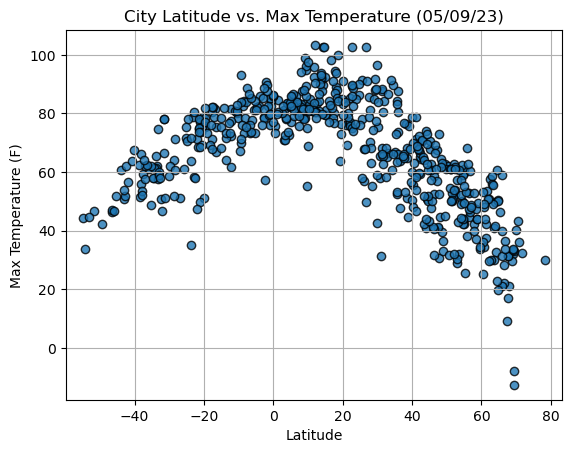

In [23]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], edgecolors="black", linewidths=1, marker="o", alpha=0.8, label="Cities")

# Set the chart title, x-axis label, and y-axis label
plt.title("City Latitude vs. Max Temperature (%s)" % time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")

# Set the x-axis and y-axis limits
plt.xlim(min(city_data_df["Lat"])-5, max(city_data_df["Lat"])+5)
plt.ylim(min(city_data_df["Max Temp"])-5, max(city_data_df["Max Temp"])+5)

# Incorporate a grid for the chart
plt.grid()

# Save the figure
plt.savefig("Fig1.png")

# Show plot
plt.show()


#### Latitude Vs. Humidity

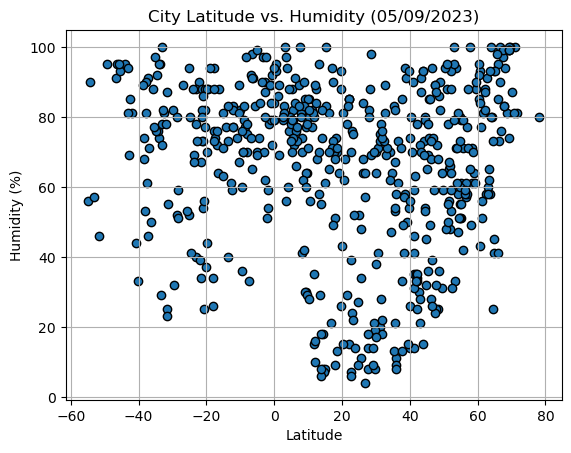

In [25]:
from datetime import datetime

# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], edgecolor="black")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Humidity ({datetime.now().strftime('%m/%d/%Y')})")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)

# Save the figure|
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()


#### Latitude Vs. Cloudiness

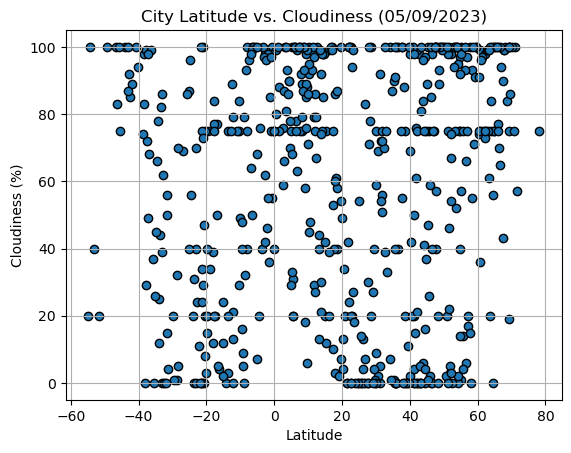

In [26]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], edgecolor="black")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Cloudiness ({datetime.now().strftime('%m/%d/%Y')})")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()


#### Latitude vs. Wind Speed Plot

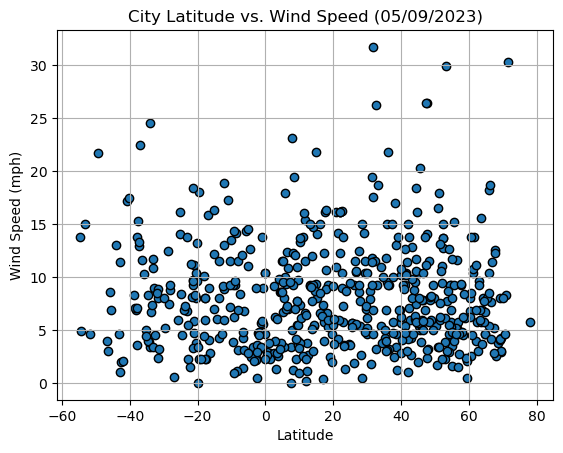

In [27]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], edgecolor="black")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Wind Speed ({datetime.now().strftime('%m/%d/%Y')})")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()


---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots
create_linregress_plot(city_data_df["Lat"], city_data_df["Max Temp"], "Latitude", "Max Temperature (F)", 
                       f"City Latitude vs. Max Temperature ({datetime.now().strftime('%m/%d/%Y')})", 
                       "output_data/Fig5.png")


In [34]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hem_df = city_data_df.loc[city_data_df["Lat"] >= 0]

# Display sample data
northern_hem_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,ilulissat,69.2167,-51.1000,32.02,74,75,8.05,GL,1683656719
1,keflavik,64.0049,-22.5624,49.91,100,75,6.91,IS,1683656720
3,qaqortoq,60.7167,-46.0333,34.45,93,99,2.55,GL,1683656720
5,sitia,35.2000,26.0986,66.97,83,90,4.25,GR,1683656721
7,ciudad lazaro cardenas,17.9583,-102.2000,89.04,51,3,10.65,MX,1683656721


In [35]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"] < 0]

southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
2,ushuaia,-54.8000,-68.3000,44.22,56,20,13.80,AR,1683656720
4,adamstown,-25.0660,-130.1015,71.65,52,87,14.03,PN,1683656721
6,west island,-12.1568,96.8225,81.36,83,21,18.90,CC,1683656721
10,port-aux-francais,-49.3500,70.2167,42.42,95,100,21.70,TF,1683656722
14,margaret river,-33.9500,115.0667,65.53,74,12,24.58,AU,1683656722


###  Temperature vs. Latitude Linear Regression Plot

The r-squared is: 0.6675771958613699


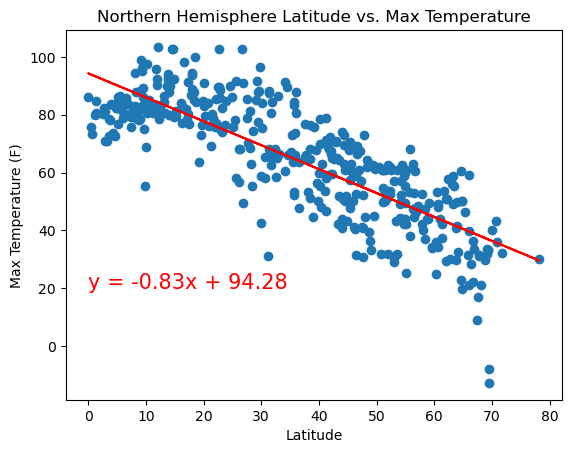

In [36]:
# Linear regression on Northern Hemisphere
# Set x and y values for linear regression
x_values = northern_hem_df["Lat"]
y_values = northern_hem_df["Max Temp"]

# Perform linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Create scatter plot
plt.scatter(x_values,y_values)

# Add regression line to plot
plt.plot(x_values,regress_values,"r-")

# Add equation to plot
plt.annotate(line_eq,(0,20),fontsize=15,color="red")

# Add labels and title to plot
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.title("Northern Hemisphere Latitude vs. Max Temperature")

# Print r-squared value
print(f"The r-squared is: {rvalue**2}")

# Show plot
plt.show()


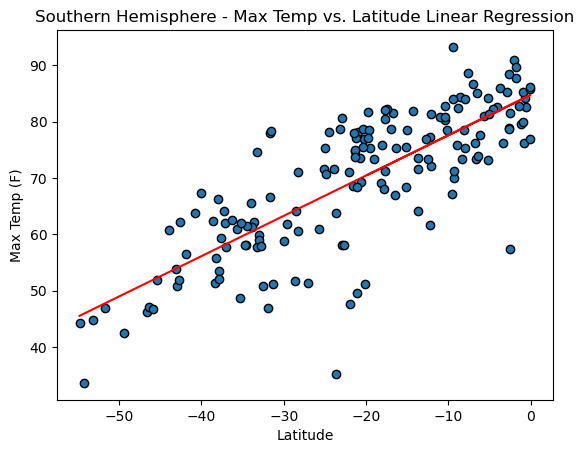

In [38]:
# Linear regression on Southern Hemisphere
southern_hemisphere = southern_hemi_df
# Create a scatter plot of latitude versus maximum temperature in the Southern Hemisphere
plt.scatter(southern_hemisphere["Lat"], southern_hemisphere["Max Temp"], edgecolor="black")

# Calculate the linear regression values
slope, intercept, r_value, p_value, std_err = linregress(southern_hemisphere["Lat"], southern_hemisphere["Max Temp"])

# Calculate the regression line
regress_values = slope * southern_hemisphere["Lat"] + intercept

# Plot the regression line
plt.plot(southern_hemisphere["Lat"], regress_values, color="red")

# Add labels and title to the plot
plt.xlabel("Latitude")
plt.ylabel("Max Temp (F)")
plt.title("Southern Hemisphere - Max Temp vs. Latitude Linear Regression")

# Display the plot
plt.show()


**Discussion about the linear relationship:** In the northern hemisphere, as latidude goes up temperature goes down. The opposite is true for the southern hemisphere. In the southern hemisphere as temperature goes up so does the temperature.

Humidity vs. Latitude Linear Regression Plot

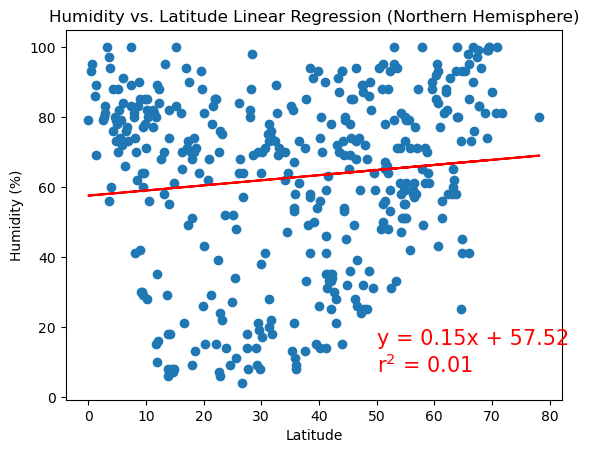

In [41]:
northern_hemisphere = northern_hem_df
# Northern Hemisphere
# Create a scatter plot of Humidity vs. Latitude in the Northern Hemisphere
plt.scatter(northern_hemisphere["Lat"], northern_hemisphere["Humidity"])

# Calculate the linear regression values
slope, intercept, r_value, p_value, std_err = linregress(northern_hemisphere["Lat"], northern_hemisphere["Humidity"])

# Create a line plot of the regression line
regress_values = slope * northern_hemisphere["Lat"] + intercept
plt.plot(northern_hemisphere["Lat"], regress_values, "r")

# Add the equation of the regression line and the correlation coefficient to the plot
equation = f"y = {slope:.2f}x + {intercept:.2f}"
r_squared = f"r$^2$ = {r_value**2:.2f}"
plt.annotate(equation, (50, 15), fontsize=15, color="red")
plt.annotate(r_squared, (50, 7), fontsize=15, color="red")

# Add a title, xlabel, and ylabel to the plot
plt.title("Humidity vs. Latitude Linear Regression (Northern Hemisphere)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

# Save the figure
plt.savefig("output_data/Fig5.png")

# Show the plot
plt.show()


The r-value is: 0.08


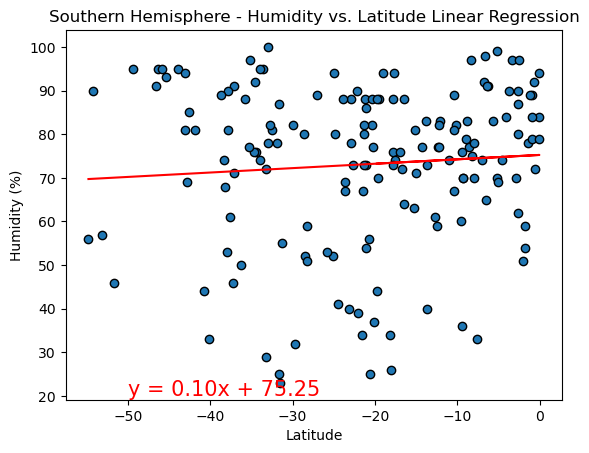

In [42]:
# Southern Hemisphere
# Create a scatter plot of latitude versus humidity in the Southern Hemisphere
plt.scatter(southern_hemisphere["Lat"], southern_hemisphere["Humidity"], edgecolor="black")

# Calculate the linear regression values
slope, intercept, r_value, p_value, std_err = linregress(southern_hemisphere["Lat"], southern_hemisphere["Humidity"])

# Get the regression line values
regress_values = slope * southern_hemisphere["Lat"] + intercept

# Create the line equation string
line_eq = f"y = {slope:.2f}x + {intercept:.2f}"

# Create and plot the regression line
plt.plot(southern_hemisphere["Lat"], regress_values, "r-")

# Add the line equation to the plot
plt.annotate(line_eq, (-50, 20), fontsize=15, color="red")

# Set the title, x-label, and y-label of the plot
plt.title("Southern Hemisphere - Humidity vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

# Print the r-value
print(f"The r-value is: {r_value:.2f}")

# Save the figure
plt.savefig("output_data/Fig7.png")

# Show the plot
plt.show()


**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

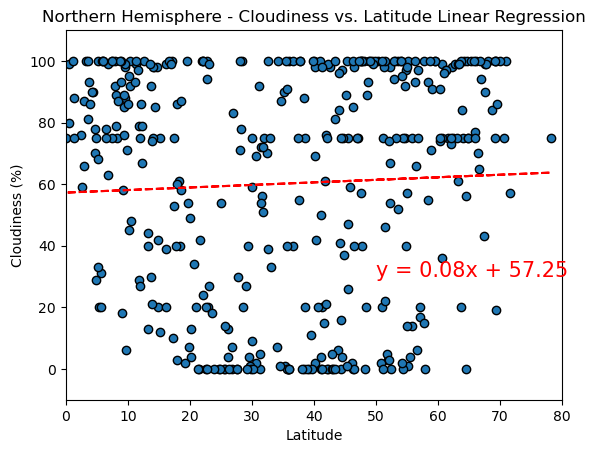

In [43]:
# Northern Hemisphere
# Create a scatter plot of latitude versus cloudiness in the Northern Hemisphere
plt.scatter(northern_hemisphere["Lat"], northern_hemisphere["Cloudiness"], edgecolor="black")

# Calculate the linear regression values
slope, intercept, r_value, p_value, std_err = linregress(northern_hemisphere["Lat"], northern_hemisphere["Cloudiness"])

# Create equation of line to calculate predicted cloudiness values
fit = slope * northern_hemisphere["Lat"] + intercept

# Create equation string
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Create annotate
plt.annotate(line_eq, (50,30), fontsize=15, color="red")

# Plot the regression line
plt.plot(northern_hemisphere["Lat"], fit, "--", color="red")

# Set the x and y limits
plt.xlim(0, 80)
plt.ylim(-10, 110)

# Add labels and title to plot
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("Northern Hemisphere - Cloudiness vs. Latitude Linear Regression")

# Save the figure
plt.savefig("output_data/Fig7.png")

# Show plot
plt.show()


The r-value is: 0.017929629252407774


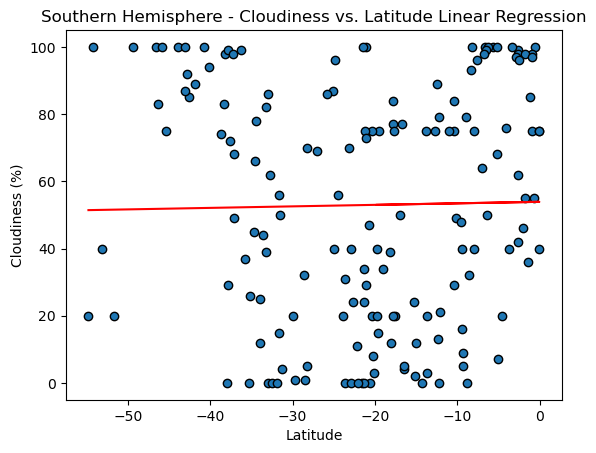

In [44]:
# Southern Hemisphere
# Create a scatter plot of latitude versus cloudiness in the Southern Hemisphere
plt.scatter(southern_hemisphere["Lat"], southern_hemisphere["Cloudiness"], edgecolor="black")

# Calculate the linear regression values
slope, intercept, r_value, p_value, std_err = linregress(southern_hemisphere["Lat"], southern_hemisphere["Cloudiness"])
regress_values = slope * southern_hemisphere["Lat"] + intercept

# Plot the regression line
plt.plot(southern_hemisphere["Lat"], regress_values, "r-")

# Add labels and title
plt.title("Southern Hemisphere - Cloudiness vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

# Print r-value
print(f"The r-value is: {r_value}")

# Save the figure
plt.savefig("output_data/Fig7.png")

# Show plot
plt.show()


**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

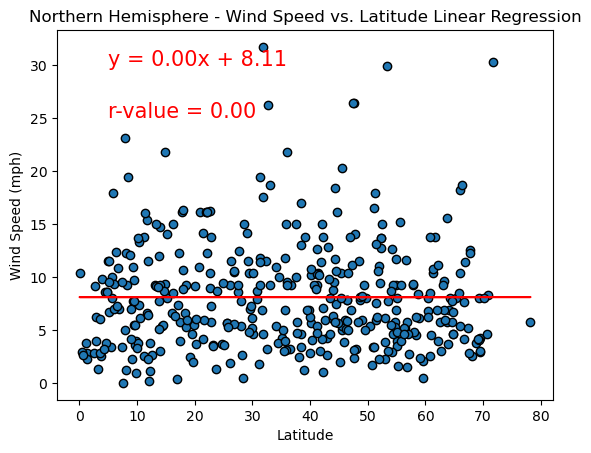

In [45]:
# Northern Hemisphere
# Create a scatter plot of latitude versus wind speed in the Northern Hemisphere
plt.scatter(northern_hemisphere["Lat"], northern_hemisphere["Wind Speed"], edgecolor="black")

# Calculate the linear regression values
slope, intercept, r_value, p_value, std_err = linregress(northern_hemisphere["Lat"], northern_hemisphere["Wind Speed"])

# Calculate the regression line "y values" from the slope and intercept
regress_values = slope * northern_hemisphere["Lat"] + intercept

# Create the line equation string
line_eq = f"y = {slope:.2f}x + {intercept:.2f}"

# Plot the regression line
plt.plot(northern_hemisphere["Lat"], regress_values, "r-")

# Annotate the line equation and r-value on the plot
plt.annotate(line_eq, (5, 30), fontsize=15, color="red")
plt.annotate(f"r-value = {r_value:.2f}", (5, 25), fontsize=15, color="red")

# Set the title, x-axis label, and y-axis label
plt.title("Northern Hemisphere - Wind Speed vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")

# Save the figure
plt.savefig("output_data/Fig7.png")

# Show plot
plt.show()


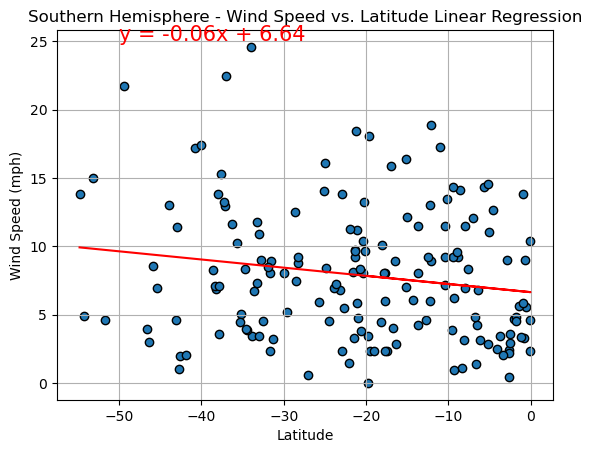

In [46]:
# Southern Hemisphere
# Create a scatter plot of latitude versus wind speed in the Southern Hemisphere
plt.scatter(southern_hemisphere["Lat"], southern_hemisphere["Wind Speed"], edgecolor="black")

# Calculate the linear regression values
slope, intercept, r_value, p_value, std_err = linregress(southern_hemisphere["Lat"], southern_hemisphere["Wind Speed"])

# Create equation of line
line_eq = f"y = {round(slope,2)}x + {round(intercept,2)}"

# Create a plot of the linear regression line
plt.plot(southern_hemisphere["Lat"], slope * southern_hemisphere["Lat"] + intercept, color="red")

# Add the linear regression equation to the plot
plt.annotate(line_eq, (-50, 25), fontsize=15, color="red")

# Add the plot title, axis labels, and grid
plt.title("Southern Hemisphere - Wind Speed vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig8.png")

# Show the plot
plt.show()


**Discussion about the linear relationship:** YOUR RESPONSE HERE